In [1]:
import scvi
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import rc_context
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(5, 5))

Global seed set to 0


In [4]:
os.chdir('/disk212/yupf/database/scRNA-seq/NewAtlas') #修改路径
concat_file='./atlas_concat.h5ad'
QC_file='./atlas_qc.h5ad'
reduction_file = './atlas_rd.h5ad'
harmony_file='./atlas_harm.h5ad'
scVI_file='./atlas_scvi.h5ad'
annotation_file ='./atlas_annotation.h5ad'

In [45]:
adata=sc.read_h5ad(QC_file)

In [47]:
adata

AnnData object with n_obs × n_vars = 589101 × 3539
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'hvg'
    layers: 'counts'

In [37]:
adata.layers['counts'] = adata.X.copy()

In [49]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["project"]
                             )
model = scvi.model.SCVI(adata,
                        n_layers=2,
                        n_latent = 30,
                        gene_likelihood="nb")
model.train() #may take a while without GPU

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /disk211/public/anaconda3/envs/labBase/lib/python3.8 ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /disk211/public/anaconda3/envs/labBase/lib/python3.8 ...
  rank_zero_warn(
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that h

Epoch 14/14: 100%|██████████| 14/14 [17:19<00:00, 71.42s/it, loss=960, v_num=1]

`Trainer.fit` stopped: `max_epochs=14` reached.


Epoch 14/14: 100%|██████████| 14/14 [17:19<00:00, 74.27s/it, loss=960, v_num=1]


In [50]:
adata.obsm['X_scVI'] = model.get_latent_representation()

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


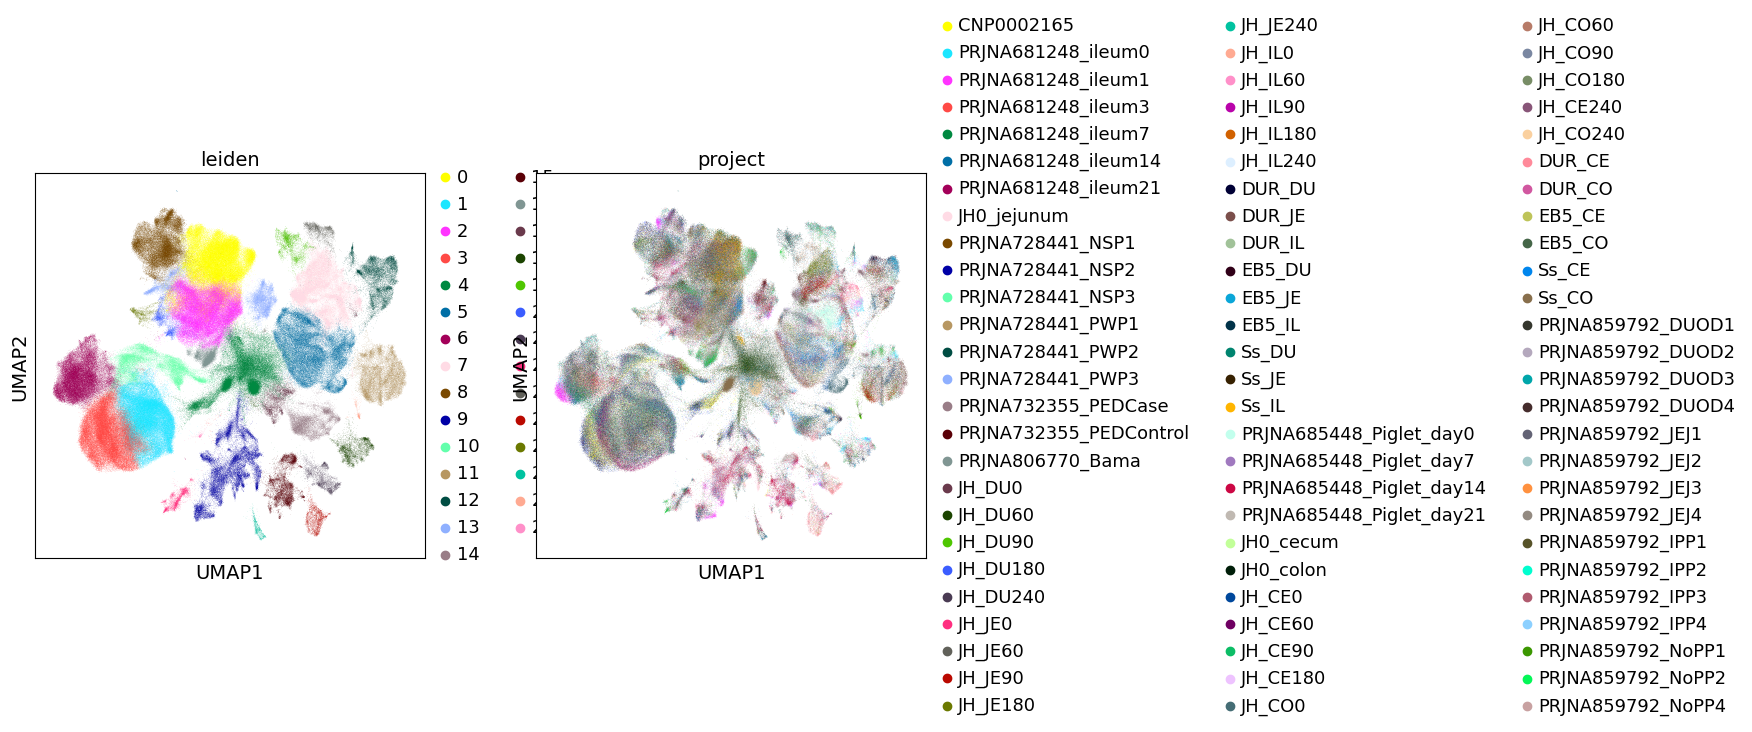

In [64]:
# sc.pp.neighbors(adata, use_rep = 'X_scVI')
# sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden','project'])

In [52]:
adata=adata.raw.to_adata()

In [55]:
adata

AnnData object with n_obs × n_vars = 589101 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'project_colors'
    obsm: '_scvi_extra_categorical_covs', 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [53]:
adata.write(scVI_file)

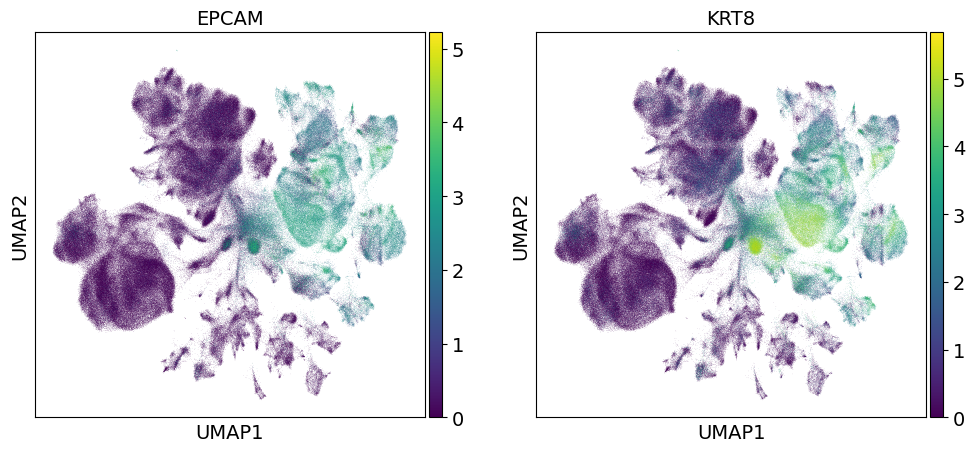

In [54]:
sc.pl.umap(adata,color=['EPCAM', 'KRT8'])

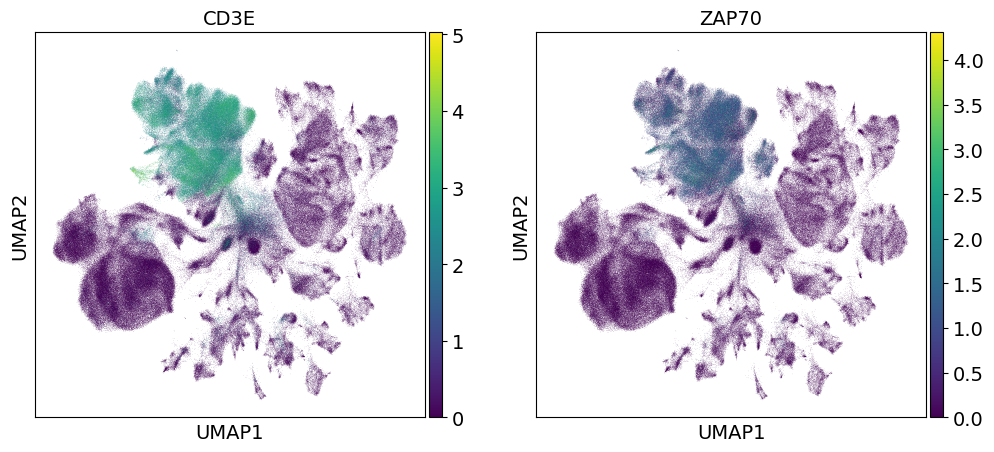

In [56]:
sc.pl.umap(adata,color=['CD3E', 'ZAP70'])

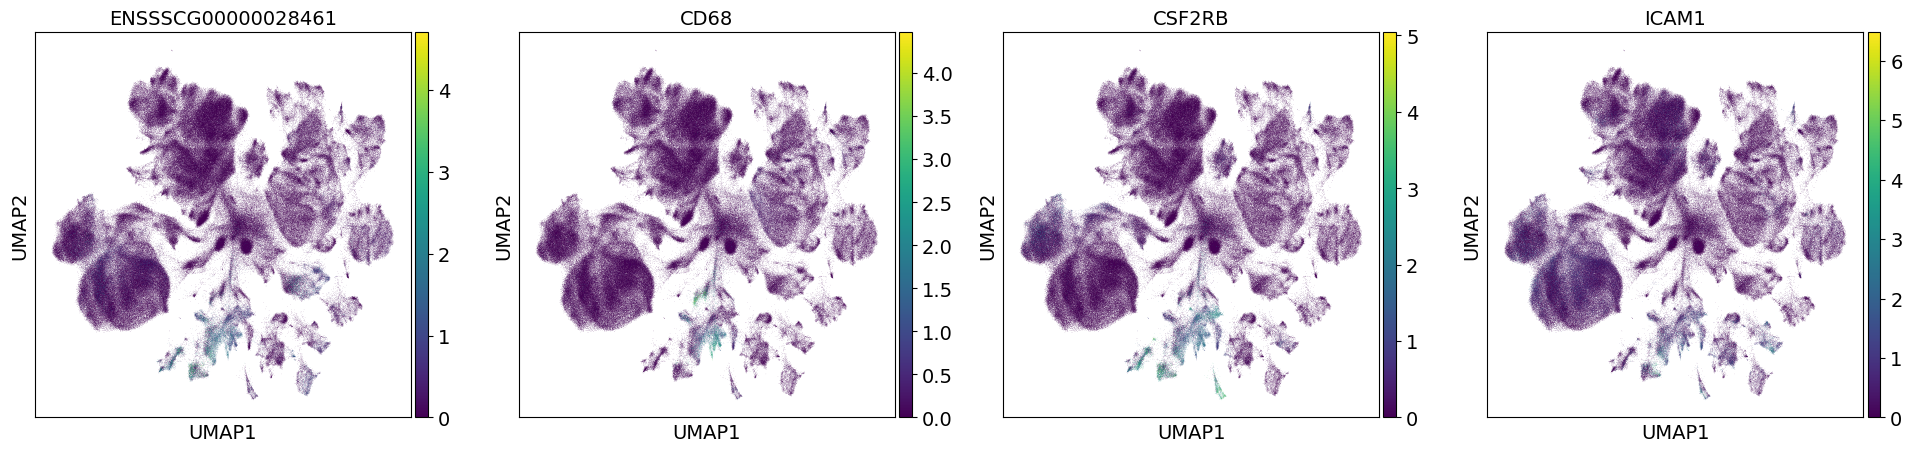

In [57]:
sc.pl.umap(adata,color=['ENSSSCG00000028461', 'CD68', 'CSF2RB', 'ICAM1'])

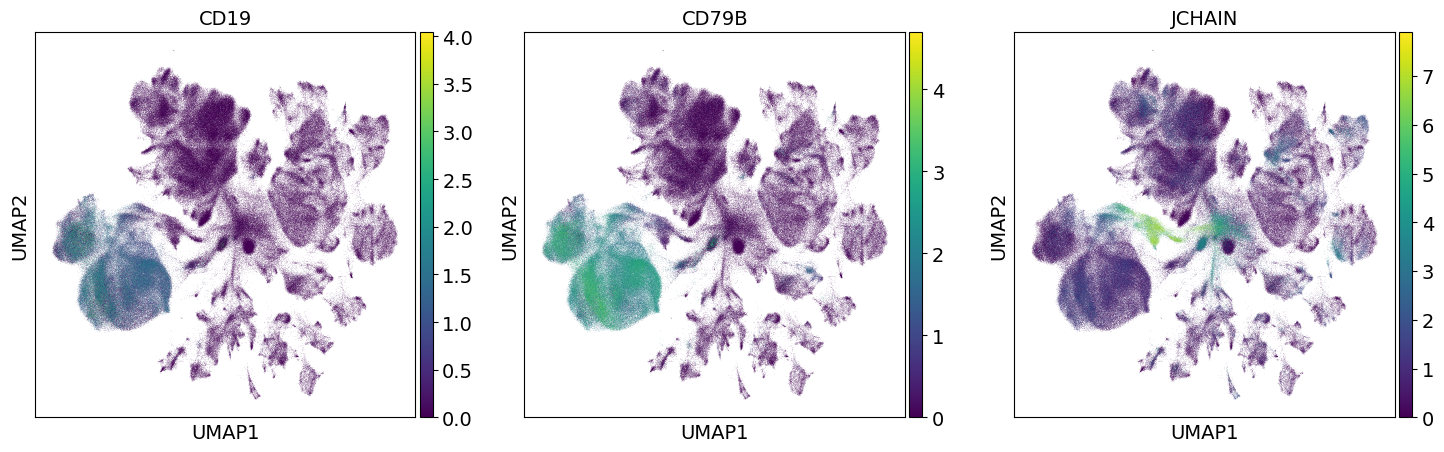

In [58]:
sc.pl.umap(adata,color=['CD19', 'CD79B', 'JCHAIN'])

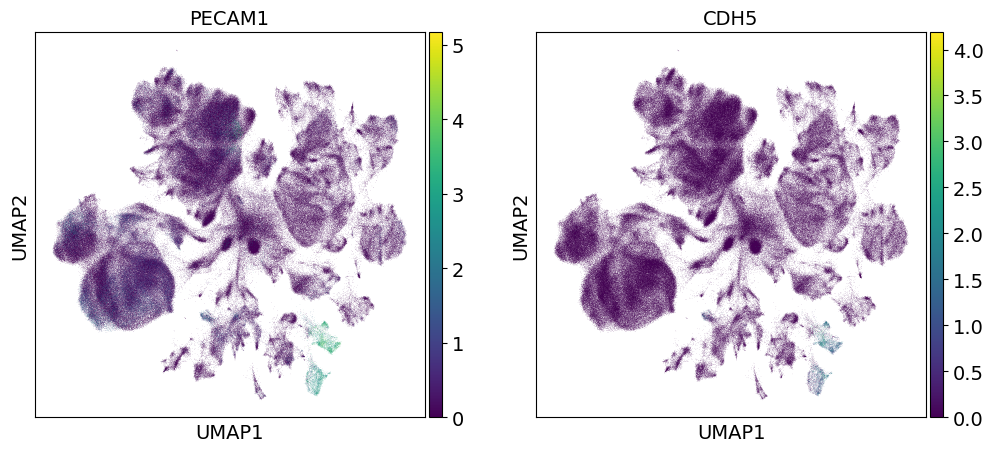

In [59]:
sc.pl.umap(adata,color=['PECAM1','CDH5'])

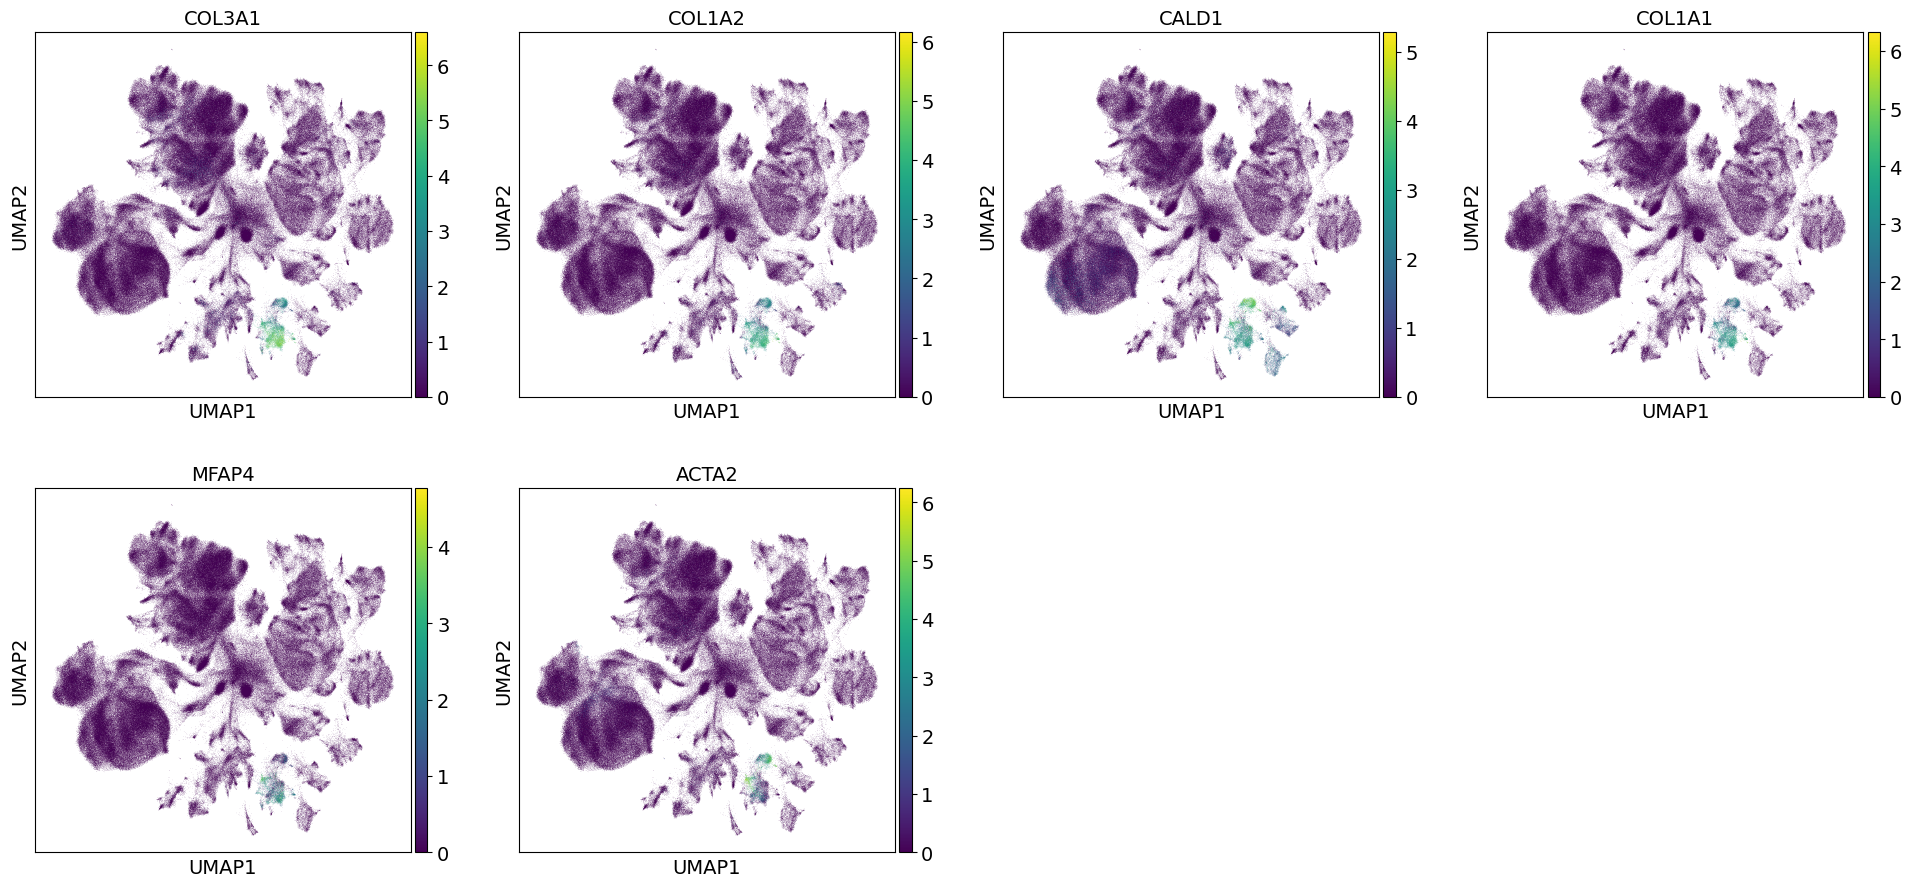

In [60]:
sc.pl.umap(adata,color=['COL3A1','COL1A2','CALD1','COL1A1', 'MFAP4','ACTA2'])

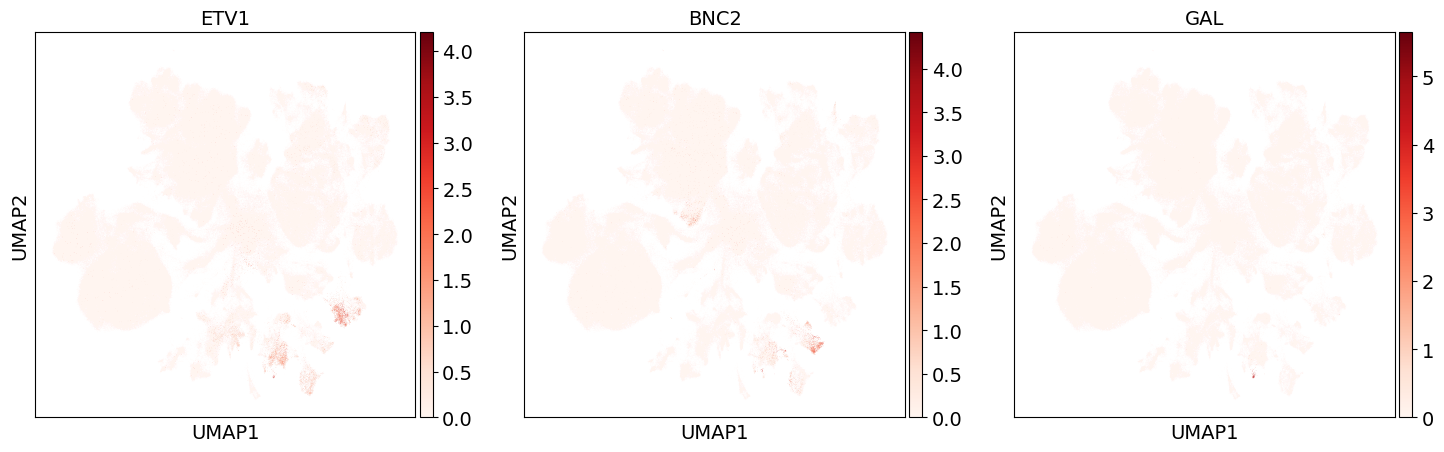

In [63]:
sc.pl.umap(adata,color=['ETV1','BNC2','GAL'],color_map='Reds')

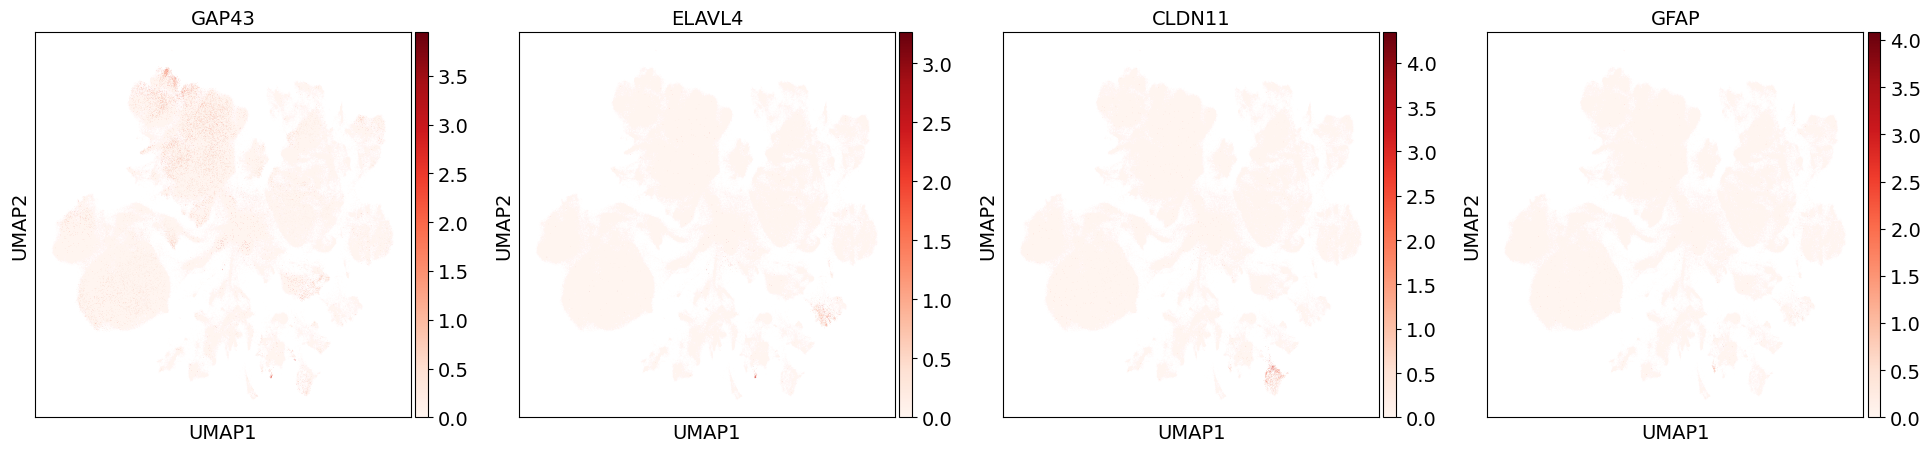

In [62]:
sc.pl.umap(adata,color=['GAP43','ELAVL4','CLDN11','GFAP'],color_map='Reds')

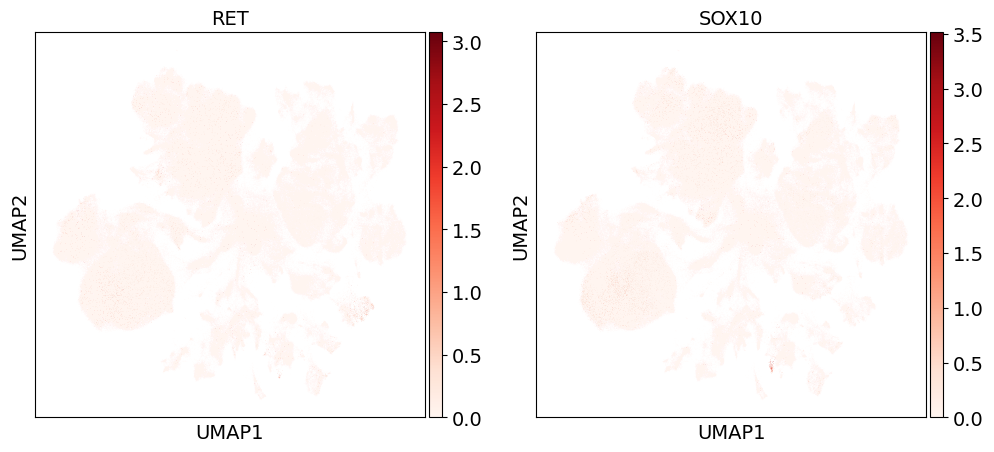

In [61]:
sc.pl.umap(adata,color=['RET','SOX10'],color_map='Reds')

In [ ]:
import anndata

# gene_index = adata.var_names.get_loc('SOX10')
# gene_index = adata.var_names.get_loc('CLDN11')
expression_threshold = 1.0
selected_cells = adata[adata.X[:, gene_index] > expression_threshold]

# 打印满足条件的细胞索引
print(selected_cells)

View of AnnData object with n_obs × n_vars = 736 × 2500
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'project_colors'
    obsm: '_scvi_extra_categorical_covs', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'


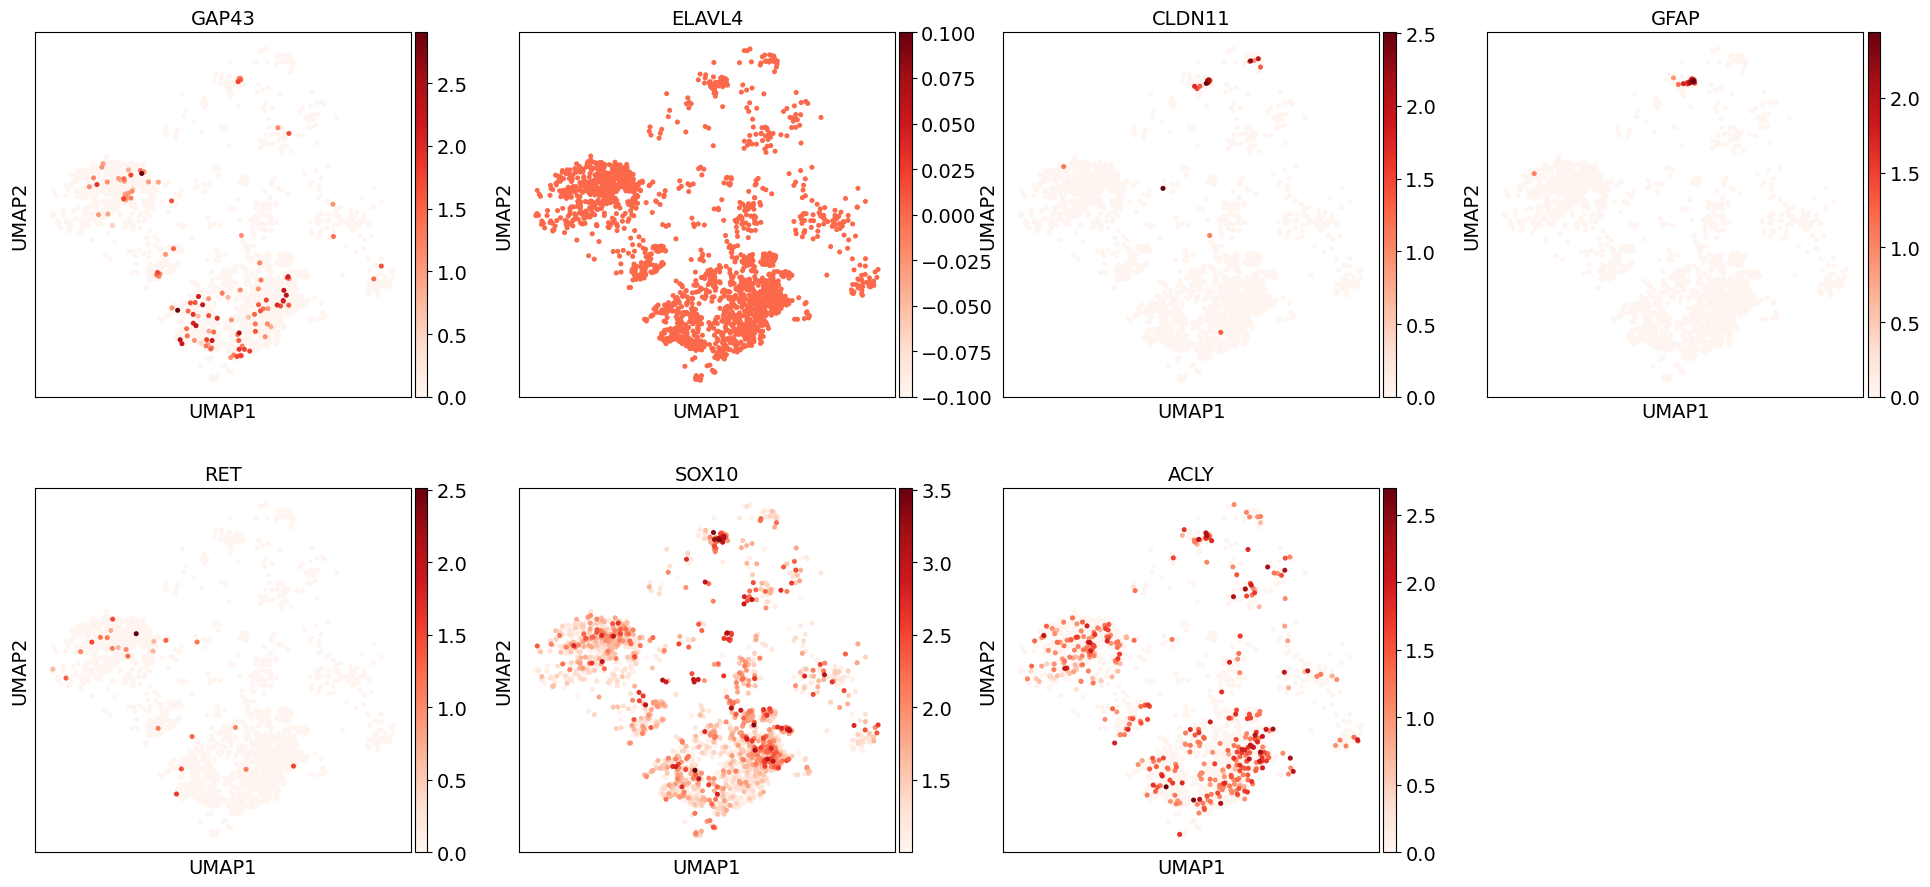

In [30]:
sc.pl.umap(selected_cells,color=['GAP43','ELAVL4','CLDN11','GFAP','RET','SOX10','ACLY'],color_map='Reds')

In [ ]:
adata.write(scVI_file)